Importamos las librerias necesarias

In [1]:
# utilizado para manejos de directorios y rutas
import os
import pandas as pd
# Computacion vectorial y cientifica para python
import numpy as np
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

Luego ingresamos el Dataset, almacenando en una variable, luego verificando si el archivo existe y con ayuda de la librería de pandas cargamos todos los datos al dataset.

In [2]:
# Verificar si el archivo existe
ruta_archivo = 'California_Houses.csv'  # Asegúrate de que el nombre sea exacto
if not os.path.exists(ruta_archivo):
    print(f"El archivo no existe en la ruta: {os.path.abspath(ruta_archivo)}")
else:
    print(f"El archivo existe. Cargando datos...")
    data = pd.read_csv(ruta_archivo)

El archivo existe. Cargando datos...


Imprimimos los nombres de las columnas de ejemplos

In [3]:
# Imprimir los nombres de las columnas para verificar
print("Columnas disponibles en el dataset:")
print(data.columns)

Columnas disponibles en el dataset:
Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')


Realizamos el proceso de seleccion de caracteristicas, que serian las X's y la variable objetivo que seria la Y, en este caso nosotros queremos hallar el valor medio de una casa, por tanto esa sera nuestra Y y el resto de caracteristicas las X's 

In [4]:
# Seleccionar características X's y variable objetivo Y's
X = data[['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms', 
                     'Population', 'Households', 'Latitude', 'Longitude', 
                     'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego']]  # Columnas seleccionadas
Y = data['Median_House_Value']  # Variable objetivo
m = Y.size  # número de ejempores (filas)

Normalización

Ahora creamos una funcion para aplicar la desviacion estandar con ayuda de las herramientas que nos proporciona la libreria Numpy, Esta desviacion estándar nos ayuda a medir cuánta variación hay en el rango de valores de una característica en particular (la mayoría de los puntos caeran en un rango de ± 2 en relación a la desviaciones estándar de la media); esta es una alternativa a tomar el rango de valores (max-min).

In [5]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])      #ejemplos
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)   #columa
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma   #formula de norm carac

    return X_norm, mu, sigma

In [6]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

       Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  Population  \
0             8.3252          41        880           129         322   
1             8.3014          21       7099          1106        2401   
2             7.2574          52       1467           190         496   
3             5.6431          52       1274           235         558   
4             3.8462          52       1627           280         565   
...              ...         ...        ...           ...         ...   
20635         1.5603          25       1665           374         845   
20636         2.5568          18        697           150         356   
20637         1.7000          17       2254           485        1007   
20638         1.8672          18       1860           409         741   
20639         2.3886          16       2785           616        1387   

       Households  Latitude  Longitude  Distance_to_coast  Distance_to_LA  \
0             126     37.88    -122.23        

Ahora añadimos a la matriz la columna de 1's, para las operaciones, especialmente para remplazar x0

In [7]:
# Añade el termino de interseccion a X
# (Columna de unos para el termino Ind)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

DESCENCO POR EL GRADIENTE

Funcion de Costos

In [8]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y)) #MSE

    return J

Función para el descenso por el Gradiente

In [9]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = [] #lista para almacenar el costo it

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X) #actualizacion de descenso
        J_history.append(computeCostMulti(X, y, theta))         #almacenando c 
        3

    return theta, J_history #par ajustados y el history cost

theta calculado por el descenso por el gradiente: [206846.47253953  71235.7700928   13551.32938664   3574.86138307
  20871.55705648 -34864.47042384  15654.67880817  -8950.06033888
 -26082.41939651 -27288.59891149 -21293.92887245   1414.16589136]
El precio estimado de este ejemplo (usando el descenso por el gradiente) es: $402262


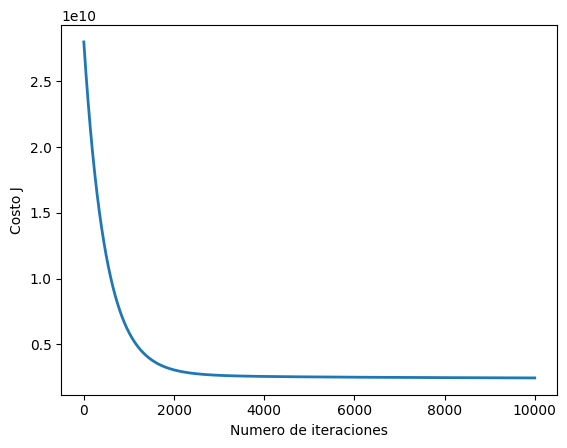

In [10]:
# inicializa los parámetros y ejecutar el descenso por el gradiente
alpha = 0.001  # Elegir algun valor para alpha 
num_iters = 10000
theta = np.zeros(X.shape[1]) #I parame con 0s 
theta, J_history = gradientDescentMulti(X, Y, theta, alpha, num_iters) #ejec dpeg para ajustar

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa
X_array = [1, 2.34476576, 0.98214266, -0.804819, -0.970706, -0.974429, -0.977033, 1.052548, -1.327835, -0.635876, 1.158969, 1.165668]
price = np.dot(X_array, theta)

print('El precio estimado de este ejemplo (usando el descenso por el gradiente) es: ${:.0f}'.format(price))

Ecuación de la normal

In [11]:
# 1. Cargar datos
data = pd.read_csv('California_Houses.csv')

# Separar características (X) y variable objetivo (y)
X = data.drop('Median_House_Value', axis=1)  # Todas las columnas excepto 'Median_House_Value'
y = data['Median_House_Value']               # Columna 'Median_House_Value' es la variable objetivo
m = y.size                                   # Número de ejemplos de entrenamiento
# 2. Preprocesar datos
# Añadir una columna de unos a X para el término de intersección 
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [12]:
# 3. Ecuación normal
def normalEqn(X, y):
    # Calcular theta usando la ecuación normal
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return theta


In [13]:
# Calcular los parámetros óptimos
theta = normalEqn(X, y)

# Mostrar los parámetros calculados
print('Theta calculado a partir de la ecuación normal:')
print(theta)

# 4. Hacer predicciones
# Crear un ejemplo para predecir (ajusta los valores según tu dataset)
# Asegúrate de que X_array tenga la misma longitud que theta
# Ejemplo: [1, Median_Income, Median_Age, Tot_Rooms, Tot_Bedrooms, Population, Households, Latitude, Longitude, Distance_to_coast, Distance_to_LA, Distance_to_SanDiego]
X_array = [1, 8.3252, 41.0, 880.0, 129.0, 322.0, 126.0, 37.88, -122.23, 50.0, 300.0, 500.0, 0.0, 0.0]  # Ajusta los valores según tu dataset
price = np.dot(X_array, theta)

# Mostrar la predicción
print('Precio predecido para la casa de ejemplo: ${:.0f}'.format(price))

Theta calculado a partir de la ecuación normal:
[-1.74366243e+06  3.91028684e+04  8.76791687e+02 -5.69708341e+00
  1.02998886e+02 -3.98321881e+01  4.70091196e+01 -4.40924514e+04
 -2.75174407e+04 -2.32201092e-01 -1.47363972e-01  2.36468464e-01
  1.62519906e-01 -1.39613373e-01]
Precio predecido para la casa de ejemplo: $312493
